# Решение соревнования из kaggle


## *Необходимые библиотеки*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

## *Получаем данные*

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

test_ids = df_test['id']

## *Знакомство с данными*

In [3]:
df_train_copy = df_train.copy(deep=True)

y_train = df_train['FloodProbability']
df_train = df_train.drop(columns=['id', 'FloodProbability'])

df_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


In [4]:
df_test = df_test.drop(columns=['id'])

df_test.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype
---  ------                           --------------    -----
 0   MonsoonIntensity                 1117957 non-null  int64
 1   TopographyDrainage               1117957 non-null  int64
 2   RiverManagement                  1117957 non-null  int64
 3   Deforestation                    1117957 non-null  int64
 4   Urbanization                     1117957 non-null  int64
 5   ClimateChange                    1117957 non-null  int64
 6   DamsQuality                      1117957 non-null  int64
 7   Siltation                        1117957 non-null  int64
 8   AgriculturalPractices            1117957 non-null  int64
 9   Encroachments                    1117957 non-null  int64
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64
 11  DrainageSystems                  1117957 non-null  int64
 12  CoastalVulnera

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   MonsoonIntensity                 745305 non-null  int64
 1   TopographyDrainage               745305 non-null  int64
 2   RiverManagement                  745305 non-null  int64
 3   Deforestation                    745305 non-null  int64
 4   Urbanization                     745305 non-null  int64
 5   ClimateChange                    745305 non-null  int64
 6   DamsQuality                      745305 non-null  int64
 7   Siltation                        745305 non-null  int64
 8   AgriculturalPractices            745305 non-null  int64
 9   Encroachments                    745305 non-null  int64
 10  IneffectiveDisasterPreparedness  745305 non-null  int64
 11  DrainageSystems                  745305 non-null  int64
 12  CoastalVulnerability          

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,1117957.0,4.926671,2.093879,0.0,3.0,5.0,6.0,18.0
RiverManagement,1117957.0,4.955322,2.072186,0.0,4.0,5.0,6.0,16.0
Deforestation,1117957.0,4.942240,2.051689,0.0,4.0,5.0,6.0,17.0
Urbanization,1117957.0,4.942517,2.083391,0.0,3.0,5.0,6.0,17.0
ClimateChange,1117957.0,4.934093,2.057742,0.0,3.0,5.0,6.0,17.0
DamsQuality,1117957.0,4.955878,2.083063,0.0,4.0,5.0,6.0,16.0
Siltation,1117957.0,4.927791,2.065992,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,1117957.0,4.942619,2.068545,0.0,3.0,5.0,6.0,16.0
Encroachments,1117957.0,4.949230,2.083324,0.0,4.0,5.0,6.0,18.0


In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,745305.0,4.915610,2.056295,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,745305.0,4.930288,2.094117,0.0,3.0,5.0,6.0,17.0
RiverManagement,745305.0,4.960027,2.071722,0.0,4.0,5.0,6.0,16.0
Deforestation,745305.0,4.946084,2.052602,0.0,4.0,5.0,6.0,17.0
Urbanization,745305.0,4.938424,2.081816,0.0,3.0,5.0,6.0,17.0
ClimateChange,745305.0,4.933524,2.059243,0.0,3.0,5.0,6.0,17.0
DamsQuality,745305.0,4.958468,2.089312,0.0,4.0,5.0,6.0,16.0
Siltation,745305.0,4.927651,2.068110,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,745305.0,4.945308,2.073404,0.0,3.0,5.0,6.0,16.0
Encroachments,745305.0,4.950620,2.081750,0.0,4.0,5.0,6.0,17.0


Все признаки являются **категориальными**, причем с довольно близкими средними и медианами

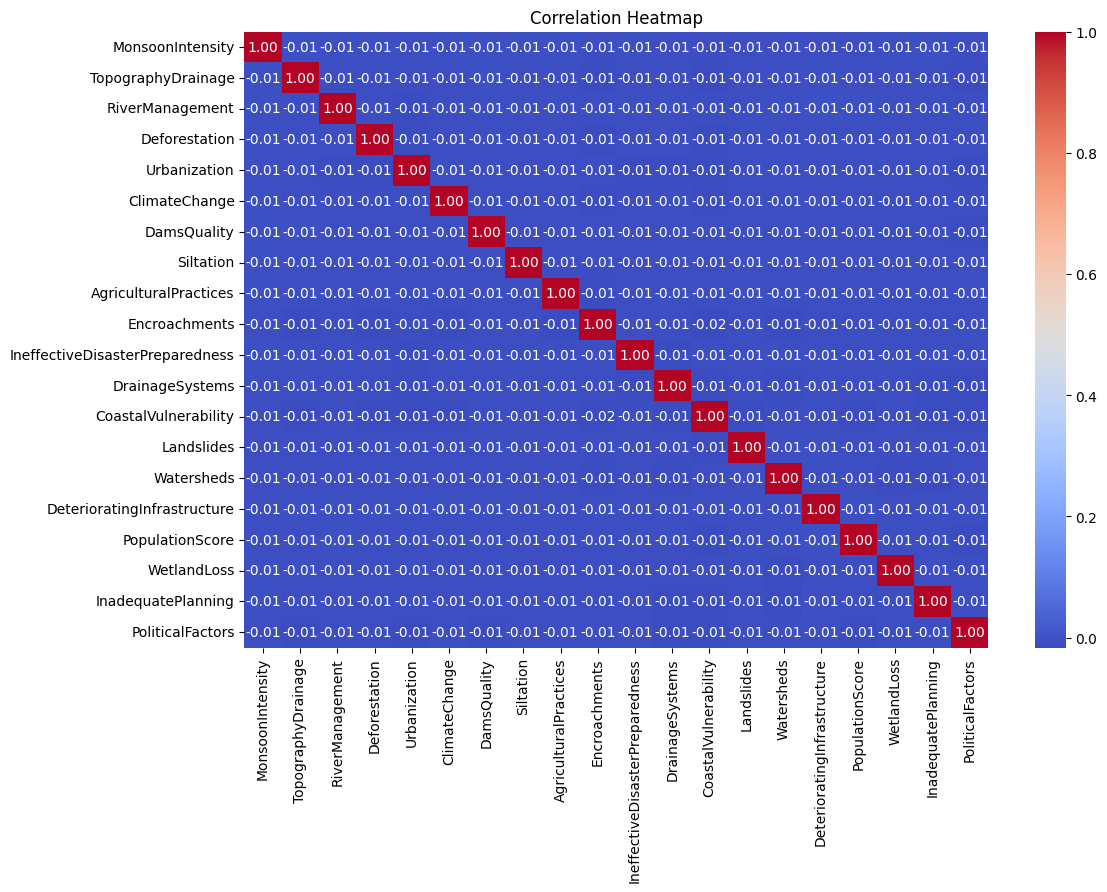

In [9]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
correlations = df_train_copy.drop(columns='id').corr()['FloodProbability'].sort_values(ascending=False)
print(correlations)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
Name: FloodProbability, dtype: float64


In [11]:
top_3_features = correlations.iloc[1:4].index.tolist()

## *Предобработка данных*

### *Работа с пропусками*

#### *Train*

In [12]:
result = pd.concat([df_train.isnull().sum(), df_train.isnull().mean()], axis=1)
result.rename(index=str, columns={0: 'total missing',1: 'proportion'})

,total missing,proportion
MonsoonIntensity,0,0.0
TopographyDrainage,0,0.0
RiverManagement,0,0.0
Deforestation,0,0.0
Urbanization,0,0.0
ClimateChange,0,0.0
DamsQuality,0,0.0
Siltation,0,0.0
AgriculturalPractices,0,0.0
Encroachments,0,0.0


#### *Test*

In [13]:
result = pd.concat([df_test.isnull().sum(), df_test.isnull().mean()], axis=1)
result.rename(index=str, columns={0: 'total missing',1: 'proportion'})

,total missing,proportion
MonsoonIntensity,0,0.0
TopographyDrainage,0,0.0
RiverManagement,0,0.0
Deforestation,0,0.0
Urbanization,0,0.0
ClimateChange,0,0.0
DamsQuality,0,0.0
Siltation,0,0.0
AgriculturalPractices,0,0.0
Encroachments,0,0.0


Пропусков нет $⇒$ заполнение проводить не нужно

### *Масштабирование*

In [14]:
pipeline = Pipeline(steps=[
    ("scaler", RobustScaler()),
    ("imputer", SimpleImputer(strategy="mean"))
])
preprocess = ColumnTransformer(transformers=[
    ("num", pipeline, df_train.columns)
])

df_train_processed = preprocess.fit_transform(df_train)
df_test_processed = preprocess.fit_transform(df_test)

df_train = pd.DataFrame(df_train_processed, columns=df_train.columns, index=df_train.index)
df_test = pd.DataFrame(df_test_processed, columns=df_test.columns, index=df_test.index)

### *Генерация признаков*

In [15]:
df_train['count'] = df_train.count(axis=1) 
df_train['sum'] = df_train.sum(axis=1)      
df_train['average'] = df_train.mean(axis=1)
df_train['median'] = df_train.median(axis=1)
df_train['mode'] = df_train.mode(axis=1)[0]  
df_train['max'] = df_train.max(axis=1)    
df_train['min'] = df_train.min(axis=1) 

In [16]:
df_test['count'] = df_test.count(axis=1) 
df_test['sum'] = df_test.sum(axis=1)   
df_test['average'] = df_test.mean(axis=1) 
df_test['median'] = df_test.median(axis=1)
df_test['mode'] = df_test.mode(axis=1)[0]  
df_test['max'] = df_test.max(axis=1)    
df_test['min'] = df_test.min(axis=1) 

## *Обучение модели*

In [17]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(verbose=False)
model.fit(df_train, y_train)

In [18]:
y_pred = model.predict(df_test)

submission = pd.DataFrame({"id": test_ids, "FloodProbability": y_pred})
submission.to_csv("submission.csv", index=False)

## *Усиление бейслайна*

### *Генерация признаков*

#### *Train*

In [59]:
pf = PolynomialFeatures(degree=2, include_bias=False).fit(df_train[top_3_features])
tmp = pf.transform(df_train[top_3_features])

df_train_poly = pd.DataFrame(tmp, columns=pf.get_feature_names_out(top_3_features)).drop(columns=top_3_features)

df_train_poly.head()

,DeterioratingInfrastructure^2,DeterioratingInfrastructure MonsoonIntensity,DeterioratingInfrastructure DamsQuality,MonsoonIntensity^2,MonsoonIntensity DamsQuality,DamsQuality^2
0,0.111111,-0.000000,0.166667,0.000000,-0.000000,0.25
1,0.000000,0.000000,-0.000000,0.111111,-0.333333,1.00
2,0.111111,0.111111,-0.666667,0.111111,-0.666667,4.00
3,0.111111,0.222222,0.166667,0.444444,0.333333,0.25
4,0.111111,-0.000000,0.333333,0.000000,-0.000000,1.00


In [60]:
df_train = pd.concat([df_train, df_train_poly], axis=1)

#### *Test*

In [61]:
pf = PolynomialFeatures(degree=2, include_bias=False).fit(df_test[top_3_features])
tmp = pf.transform(df_test[top_3_features])

df_test_poly = pd.DataFrame(tmp, columns=pf.get_feature_names_out(top_3_features)).drop(columns=top_3_features)

df_test_poly.head()

,DeterioratingInfrastructure^2,DeterioratingInfrastructure MonsoonIntensity,DeterioratingInfrastructure DamsQuality,MonsoonIntensity^2,MonsoonIntensity DamsQuality,DamsQuality^2
0,0.444444,0.222222,-1.000000,0.111111,-0.500000,2.25
1,1.777778,0.444444,0.666667,0.111111,0.166667,0.25
2,1.000000,1.333333,0.500000,1.777778,0.666667,0.25
3,0.111111,-0.333333,-0.166667,1.000000,0.500000,0.25
4,0.111111,0.111111,0.000000,0.111111,0.000000,0.00


In [62]:
df_test = pd.concat([df_test, df_test_poly], axis=1)

### *Ensemble*

In [169]:
from sklearn.model_selection import StratifiedKFold
from time import time
from sklearn.base import clone
import sklearn.metrics as skm

kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=77)
FOLDS = 7

def cross_validate_predict(model, X, y, test_data, repeat=2):
    '''
    Function to make the train preds and test preds using cross validation.
    The resultant ensemble of preds will be further used to make the final test prediction.
    '''
    start_time = time()
    scores = []
    oof_preds_full = np.full_like(y, np.nan, dtype=float)
    test_pred_final = np.zeros(len(test_data), dtype=float)
    
    for fold,(train_idx, val_idx) in enumerate(kf.split(X, y.astype(str))):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        
        y_val_pred = np.zeros_like(y_val, dtype=float)
        y_pred = np.zeros(len(test_data), dtype=float)
        
        for i in range(repeat):
            m = clone(model)
            if repeat > 1:
                mm = m
                if isinstance(mm, Pipeline):
                    mm = mm[-1]
                mm.set_params(random_state=i)
            m.fit(X_train, y_train)
            y_val_pred += m.predict(x_val)
            y_pred += m.predict(test_data)
        y_val_pred /= repeat
        y_pred /= repeat
        
        score = skm.r2_score(y_val, y_val_pred)
        print(f'# Fold {fold}: R2 Score = {score:0.5f}')
        scores.append(score)
        oof_preds_full[val_idx] = y_val_pred
        test_pred_final += y_pred
        
    test_pred_final /= FOLDS
    
    total_time = time() - start_time
    if isinstance(m, Pipeline):
        model_name = m[-1].__class__.__name__
    else:
        model_name = m.__class__.__name__
        
    print(f'# Mean R2 Score = {np.mean(scores):0.5f} ± {np.std(scores):0.5f} for {model_name}\n'
          f'Time Elapsed: {np.round((total_time / 60),0)} Min \n')

    return oof_preds_full, test_pred_final

In [170]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge

xgr_tr_pred1, xgr_ts_pred1 = cross_validate_predict(XGBRegressor(), df_train, y_train, df_test)

cbr_tr_pred2, cbr_ts_pred2 = cross_validate_predict(CatBoostRegressor(verbose=False), df_train, y_train, df_test)

lgr_tr_pred3, lgr_ts_pred3 = cross_validate_predict(LGBMRegressor(verbose=0), df_train, y_train, df_test)

# Fold 0: R2 Score = 0.85646
# Fold 1: R2 Score = 0.85644
# Fold 2: R2 Score = 0.85619
# Fold 3: R2 Score = 0.85600
# Fold 4: R2 Score = 0.85509
# Fold 5: R2 Score = 0.85632
# Fold 6: R2 Score = 0.85519
# Mean R2 Score = 0.85596 ± 0.00054 for XGBRegressor
Time Elapsed: 1.0 Min 

# Fold 0: R2 Score = 0.85857
# Fold 1: R2 Score = 0.85837
# Fold 2: R2 Score = 0.85809
# Fold 3: R2 Score = 0.85794
# Fold 4: R2 Score = 0.85702
# Fold 5: R2 Score = 0.85839
# Fold 6: R2 Score = 0.85717
# Mean R2 Score = 0.85793 ± 0.00057 for CatBoostRegressor
Time Elapsed: 7.0 Min 

# Fold 0: R2 Score = 0.85489
# Fold 1: R2 Score = 0.85470
# Fold 2: R2 Score = 0.85448
# Fold 3: R2 Score = 0.85432
# Fold 4: R2 Score = 0.85315
# Fold 5: R2 Score = 0.85472
# Fold 6: R2 Score = 0.85346
# Mean R2 Score = 0.85424 ± 0.00062 for LGBMRegressor
Time Elapsed: 1.0 Min 



In [171]:
ensemble_train = np.c_[xgr_tr_pred1, cbr_tr_pred2, lgr_tr_pred3]
ensemble_test = np.c_[xgr_ts_pred1, cbr_ts_pred2, lgr_ts_pred3]

In [172]:
ensemble_train_df = pd.DataFrame({
    'xgr': ensemble_train[:,0],
    'cbr': ensemble_train[:,1],
    'lgr': ensemble_train[:,2]
})
ensemble_test_df = pd.DataFrame({
    'xgr': ensemble_test[:,0],
    'cbr': ensemble_test[:,1],
    'lgr': ensemble_test[:,2]
})

In [173]:
_, ts_pred = cross_validate_predict(
    Ridge(fit_intercept=False, alpha=0.01),
    ensemble_train_df, y_train, ensemble_test_df)

# Fold 0: R2 Score = 0.85857
# Fold 1: R2 Score = 0.85839
# Fold 2: R2 Score = 0.85813
# Fold 3: R2 Score = 0.85797
# Fold 4: R2 Score = 0.85705
# Fold 5: R2 Score = 0.85841
# Fold 6: R2 Score = 0.85719
# Mean R2 Score = 0.85796 ± 0.00056 for Ridge
Time Elapsed: 0.0 Min 



In [174]:
submission = pd.DataFrame({"id": test_ids, "FloodProbability": ts_pred})
submission.to_csv("submission.csv", index=False)